In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
city_name=[]
temp=[]
lat=[]
clouds=[]
humidity=[]
speed=[]
 
record = 1

print(f"Beginning Data Retrieval")
print(f"----------------------------------------")

for city in cities:
    
    try:
        response= requests.get(f"{url}&q={city}").json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        clouds.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        speed.append(response['wind']['speed'])
        city_name.append(response["name"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
         
        record= record + 1
        time.sleep(1.01)
        
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
----------------------------------------
Processing Record 1 | Philadelphia
Processing Record 2 | Barrow
Processing Record 3 | Albany
Processing Record 4 | Horodnya
Processing Record 5 | Sesimbra
Processing Record 6 | Hambantota
Processing Record 7 | Ushuaia
City not found. Skipping...
Processing Record 8 | Alyangula
Processing Record 9 | Kapaa
Processing Record 10 | Masiga
Processing Record 11 | Tiksi
Processing Record 12 | Tigzirt
City not found. Skipping...
Processing Record 13 | Tashtagol
Processing Record 14 | Hermanus
Processing Record 15 | Castro
Processing Record 16 | Leningradskiy
Processing Record 17 | Aklavik
Processing Record 18 | Kununurra
Processing Record 19 | Clyde River
Processing Record 20 | Rikitea
Processing Record 21 | Porto-Novo
Processing Record 22 | Quang Ngai
Processing Record 23 | Qaanaaq
Processing Record 24 | New Norfolk
City not found. Skipping...
Processing Record 25 | Lavrentiya
Processing Record 26 | Beringovskiy
Processing Recor

In [5]:
dictionary = {
    "City": city_name,
    "Temperature": temp,
    "Latitude":lat,
    "Cloudiness":clouds,  
    "Humidity": humidity,
    "Wind Speed":speed
}

counts = pd.DataFrame(dictionary)
 
counts.count()

City           584
Temperature    584
Latitude       584
Cloudiness     584
Humidity       584
Wind Speed     584
dtype: int64

In [6]:
counts.to_csv('weather_data.csv')

counts

,City,Temperature,Latitude,Cloudiness,Humidity,Wind Speed
0,Philadelphia,46.99,39.95,90,93,3.29
1,Barrow,-25.60,71.29,1,82,8.05
2,Albany,39.99,42.60,90,100,4.70
3,Horodnya,37.17,51.89,100,93,12.21
4,Sesimbra,53.01,38.44,20,76,5.82
...,...,...,...,...,...,...
579,Brae,35.60,60.40,94,86,9.17
580,Guadix,44.01,37.30,53,93,3.51
581,Camacha,59.00,33.08,40,77,4.70
582,Flinders,91.40,-34.58,97,31,23.04


Text(0.5, 0, 'Latitude')

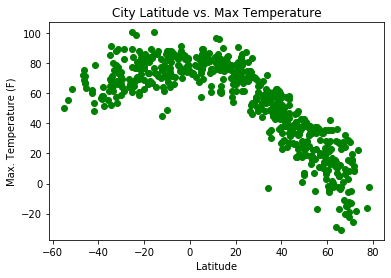

In [7]:
plt.scatter(counts["Latitude"], counts["Temperature"], marker="o", facecolor="green")

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

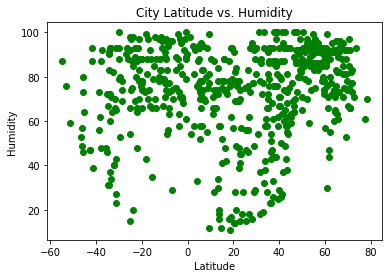

In [8]:
plt.scatter(counts["Latitude"], counts["Humidity"], marker="o", facecolor="green")

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

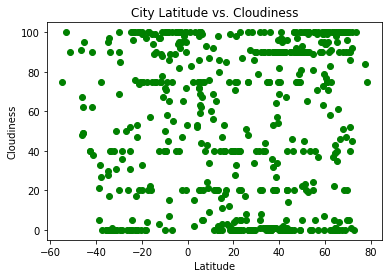

In [9]:
plt.scatter(counts["Latitude"], counts["Cloudiness"], marker="o", facecolor="green")

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

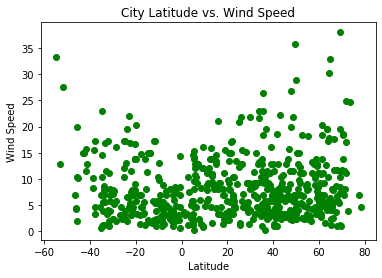

In [10]:
plt.scatter(counts["Latitude"], counts["Wind Speed"], marker="o", facecolor="green")

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")